# Problem Statement - Suicide Rate Analysis

## Context
Close to 800,000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

## Objective
The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

## Data Dictionary
We will be using the dataset about suicide rates from 1985 to 2016. This dataset has the following attributes:

- **country**: Country
- **year**: Year
- **sex**: Sex (male or female)
- **age**: Suicide age range, ages divided into six categories
- **suicides_no**: Number of suicides
- **population**: Population of that sex, in that age range, in that country, and in that year
- **suicides/100k pop**: Number of suicides per 100k population
- **generation**: Generation of the suicides in question, being possible 6 different categories
- **gdp_for_year**: GDP of the country in that year in dollars    
- **gdp_per_capita**: Ratio of the country’s GDP and its population


## Questions to Explore

- **Is the suicide rate more prominent in some age categories than others?**

- **Which countries have the most and the least number of suicides?** 

- **What is the effect of the population on suicide rates?**

- **What is the effect of the GDP of a country on suicide rates?**

- **What is the trend of suicide rates across all the years?**

- **Is there a difference between the suicide rates of men and women?**

### Import the required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [23]:
df.shape

(27820, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [60]:
df.select_dtypes(include=['float64', 'int64']).corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


"HDI for year" has relatively low correlations with other columns, with values around 0.1 to 0.3. These values suggest a relatively weak linear relationship. But it has high correlation with "gdp_per_capita ($)". So we are going to impute the feature.

In [61]:
print("Mode: \n", df['HDI for year'].mode())
print("Median: ", df['HDI for year'].median())
print("Mean: ", df['HDI for year'].mean())

Mode: 
 0    0.713
1    0.772
2    0.888
Name: HDI for year, dtype: float64
Median:  0.779
Mean:  0.7766011477761837


The Mean, Median and Mode all are about same there is no big difference between them so we are going to use common method is for imputing which mean imputation.

#### Imputing the HDI Column

In [4]:
df_copy = df.copy()

In [5]:
df_copy['HDI for year'].fillna(df_copy['HDI for year'].mean(), inplace=True)
print(df_copy['HDI for year'].isnull().sum())

0


In [6]:
df.select_dtypes(include=['float64', 'int64']).corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


#### Look For Duplicates

In [75]:
df_copy.duplicated().sum()

0

### Is the suicide rate more prominent in some age categories than others?

In [218]:
sui_age_sum = df_copy.groupby('age', as_index=False)['suicides/100k pop'].sum()
sui_age = df.groupby('age')['suicides/100k pop'].agg(suicide_rate='mean')
sui_age = sui_age.reset_index()

combined_df = pd.merge(sui_age_sum, sui_age, on='age', how='inner')
combined_df.sort_values(by='suicide_rate', ascending=False)

,age,suicides/100k pop,suicide_rate
5,75+ years,111201.01,23.955409
4,55-74 years,74994.20,16.155579
2,35-54 years,69386.02,14.947441
1,25-34 years,56571.52,12.186885
0,15-24 years,41532.69,8.947154
3,5-14 years,2858.39,0.620041


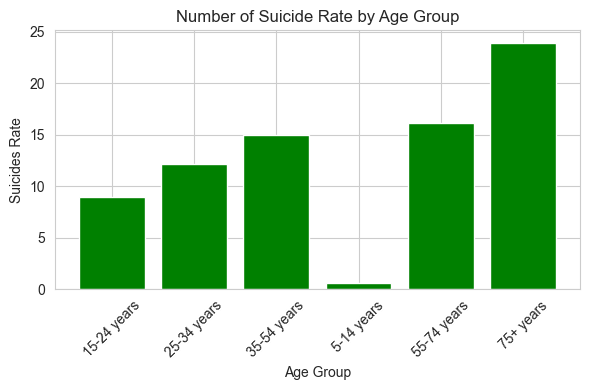

In [244]:
plt.figure(figsize=(6, 4))
plt.bar(combined_df['age'], combined_df['suicide_rate'], color='green')
plt.xlabel('Age Group')
plt.ylabel('Suicides Rate')
plt.title('Number of Suicide Rate by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

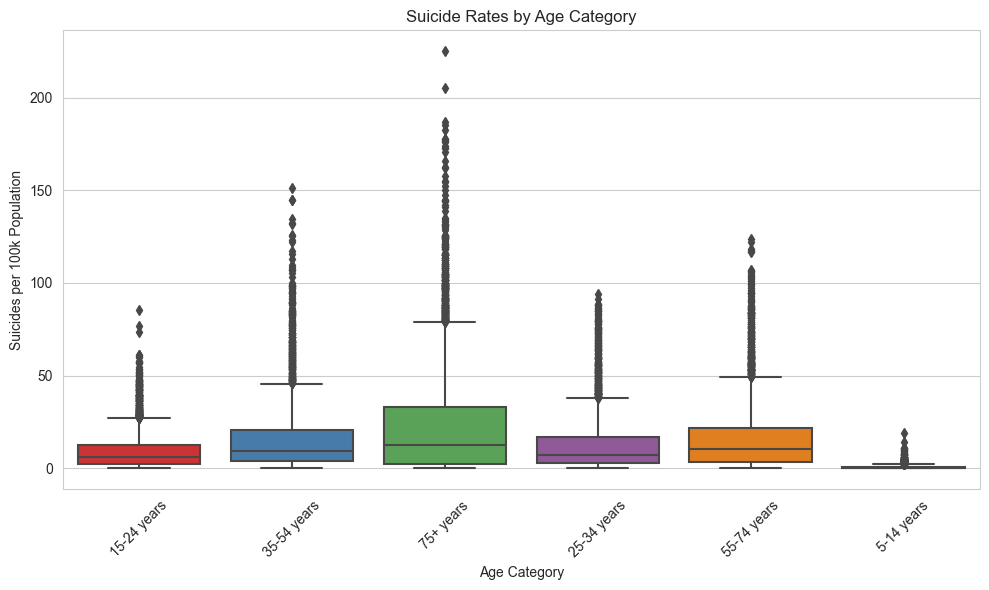

In [193]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x='age', y='suicides/100k pop', data=df_copy, palette='Set1')
plt.xlabel('Age Category')
plt.ylabel('Suicides per 100k Population')
plt.title('Suicide Rates by Age Category')
plt.xticks(rotation=45)
plt.tight_layout()

In [223]:
combined_df['age'][combined_df['suicide_rate'].idxmax()]

'75+ years'

The suicide rate more prominent in '75+ years' categories.

### Which countries have the most and the least number of suicides?

In [224]:
sui_country = df_copy.groupby('country',as_index=False)['suicides_no'].sum()
sui_country

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101
...,...,...
96,United Arab Emirates,622
97,United Kingdom,136805
98,United States,1034013
99,Uruguay,13138


In [225]:
most_no_sui = sui_country['country'][sui_country['suicides_no'].idxmax()]
least_no_sui = sui_country['country'][sui_country['suicides_no'].idxmin()]

print('The country of most number of suicides is "'+ most_no_sui.upper() + '", And the country of least number of suicides is "'+ least_no_sui.upper() + '"')

The country of most number of suicides is "RUSSIAN FEDERATION", And the country of least number of suicides is "DOMINICA"


### What is the effect of the population on suicide rates?

In [191]:
df_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [249]:
df_copy.select_dtypes(include=['float64', 'int64']).corr()
# df_copy['population'].corr(df_copy['suicides/100k pop'])

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.209036,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.062669,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.057279,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.037290,0.001785
HDI for year,0.209036,0.062669,0.057279,0.037290,1.000000,0.505505
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.505505,1.000000


<Axes: >

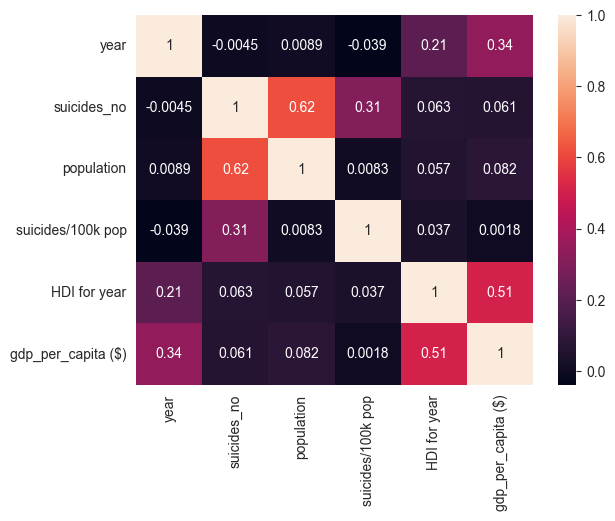

In [276]:
sns.heatmap(df_copy.select_dtypes(include=['float64', 'int64']).corr(), annot = True)

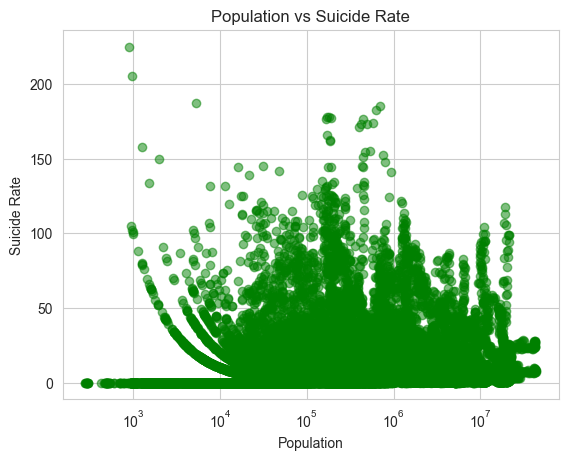

In [252]:
X = df_copy['population']
Y = df_copy['suicides/100k pop']

plt.scatter(X, Y, alpha=0.5, color='green')

plt.title('Correlation of Population vs Suicide Rate')
plt.xlabel('Population')
plt.ylabel('Suicide Rate')
plt.xscale('log')
plt.grid(True)

plt.show()

The correlation coefficient of 0.008285 suggests a weak positive relationship between population and suicide rate. This means that as population increases, there is a slight tendency for the suicide rate to also increase, but the relationship is not strong. Other factors likely play a more significant role in suicide rate variations.


### What is the effect of the GDP of a country on suicide rates?

In [258]:
df_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [263]:
df_copy.select_dtypes(include=['float64', 'int64']).corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.209036,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.062669,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.057279,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.037290,0.001785
HDI for year,0.209036,0.062669,0.057279,0.037290,1.000000,0.505505
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.505505,1.000000


In [264]:
df_copy['gdp_per_capita ($)'].corr(df_copy['suicides/100k pop'])

0.001785133797344209

In [273]:
len(df_copy['gdp_per_capita ($)'].unique())

2233

<Axes: >

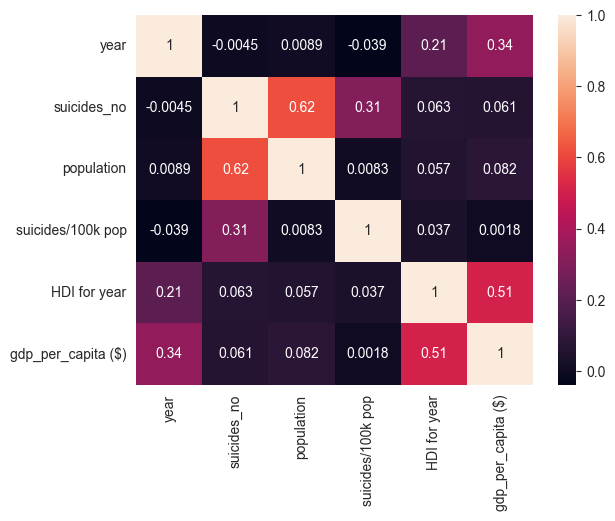

In [275]:
sns.heatmap(df_copy.select_dtypes(include=['float64', 'int64']).corr(), annot = True)

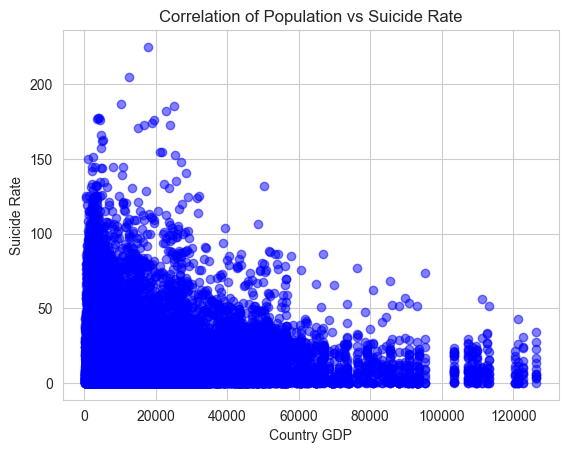

In [272]:
plt.scatter(df_copy['gdp_per_capita ($)'], df_copy['suicides/100k pop'], alpha=0.5, color='blue')

plt.title('Correlation of GDP vs Suicide Rate')
plt.xlabel('Country GDP')
plt.ylabel('Suicide Rate')

plt.show()

The correlation coefficient of around 0.0018 means there is a very tiny connection between a country's GDP per person and its suicide rate. This small connection suggests that as a country's wealth per person goes up, the suicide rate might also go up just a little, but this link is so weak that it's not really significant.

### What is the trend of suicide rates across all the years?

In [13]:
sui_rate_by_year = df_copy.groupby('year')['suicides/100k pop'].mean()
sui_rate_by_year

year
1985    11.826198
1986    11.423333
1987    11.644213
1988    12.709405
1989    12.879071
1990    12.862956
1991    13.438880
1992    13.498564
1993    13.833705
1994    14.073272
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.532038
2000    13.941328
2001    13.519138
2002    13.786550
2003    13.205019
2004    12.481944
2005    12.068442
2006    11.927461
2007    12.025339
2008    11.907686
2009    11.400787
2010    11.215900
2011    11.015349
2012    11.421718
2013    11.107958
2014    11.011464
2015    11.094073
2016    13.421187
Name: suicides/100k pop, dtype: float64

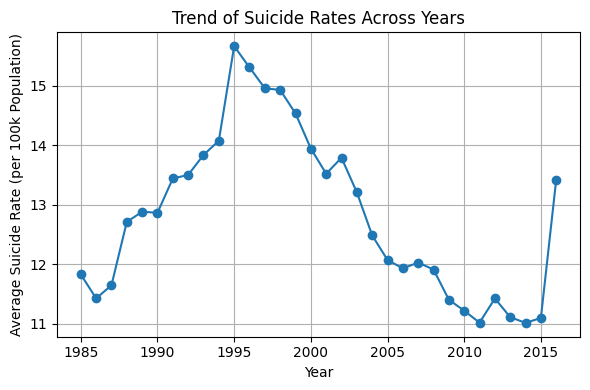

In [24]:
plt.figure(figsize=(6, 4))
plt.plot(sui_rate_by_year.index, sui_rate_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Suicide Rate (per 100k Population)')
plt.title('Trend of Suicide Rates Across Years')
plt.grid(True)
plt.tight_layout()

In [23]:
df_copy_copy = df_copy.copy()
df_copy_copy['year'] = pd.to_datetime(df_copy['year'], format='%Y')
df_copy_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987-01-01,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987-01-01,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987-01-01,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987-01-01,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987-01-01,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


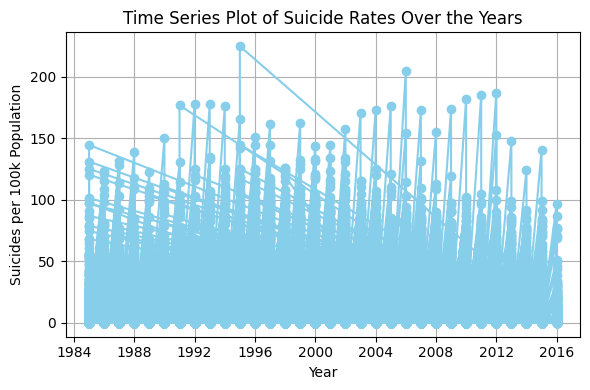

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(df_copy_copy['year'], df_copy_copy['suicides/100k pop'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.title('Time Series Plot of Suicide Rates Over the Years')
plt.grid(True)

plt.tight_layout()
plt.show()

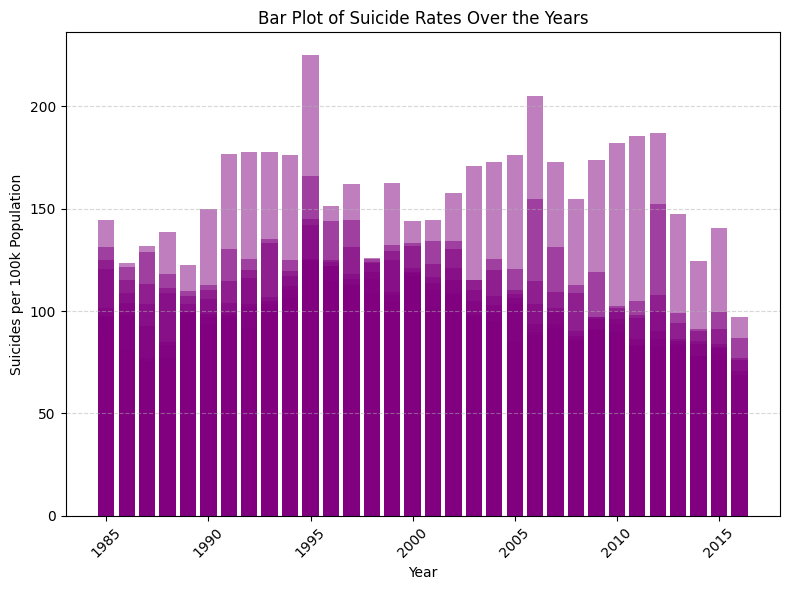

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(df_copy['year'], df_copy['suicides/100k pop'], color='purple', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.title('Bar Plot of Suicide Rates Over the Years')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Is there a difference between the suicide rates of men and women?

In [6]:
df_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [13]:
df_copy.groupby('sex')['suicides/100k pop'].max()

sex
female    133.42
male      224.97
Name: suicides/100k pop, dtype: float64

<Axes: xlabel='sex', ylabel='suicides/100k pop'>

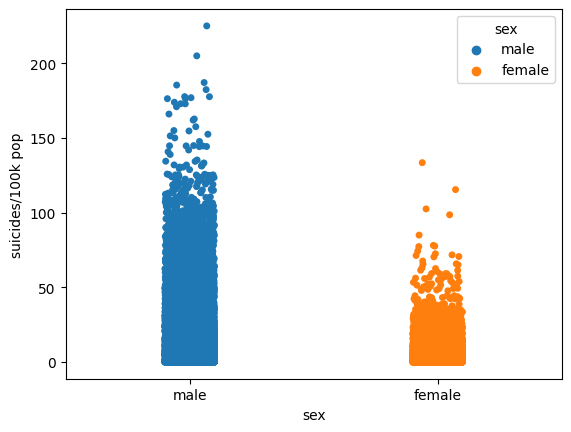

In [21]:
sns.stripplot(y = 'suicides/100k pop', x = 'sex', data = df_copy, jitter = True, hue='sex')

<Axes: xlabel='sex', ylabel='suicides/100k pop'>

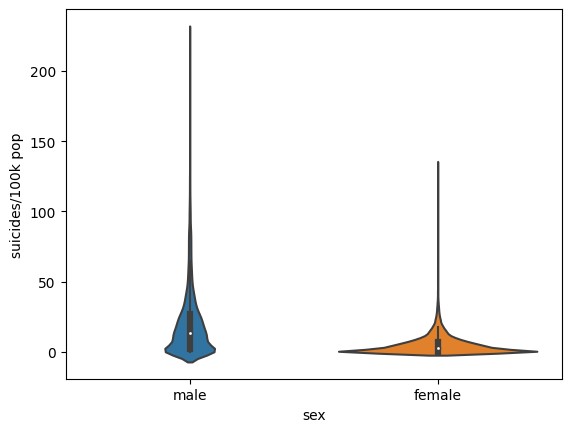

In [24]:
sns.violinplot(y = 'suicides/100k pop', x = 'sex', data = df_copy)

 we observe a difference between the suicide rates of males and females, with the male suicide rate being higher than that of females.